In [74]:
# I have not given, received, nor have I tolerated others' use of unauthorized aid.

# plotting fluff
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
# from scipy.ndimage import imread
# from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

import imageio
import visvis as vv
import glob
from pathlib import Path

imgs = {}
targetSize = (480, 640)

for img_uri in glob.glob("../Datasets/RosterImages/*.jfif"): 
    img = Image.open(img_uri)
    img_name = img_uri.split("/")[-1].split(".")[0]
    size = np.shape(img)[:2]
    
    #reversing for below comparison
    sizeRef = (size[1], size[0])
    
    if sizeRef != targetSize:
        img.resize(targetSize).save(img_uri)

    img.close()
    img = imageio.imread(img_uri, as_gray='True')
    imgs[img_name] = img

### Part 4 - Questions
1) Display and describe the centroid (the image, not the matrix). 

    a) Are there any features that clearly come from one of the contributing photos? Describe them, and identify their source photos.

_Someones striped shirt still appears very visible in the background of the centroid.  If was found that the culprit image file was JBulger._ 

    b) Display the source image (beside/below the centroid).

see below
    
    c) Explain why you think (due to the math/process) those features are particularly noticeable.
    
_Given we are analyzing these images by comparing their grey-scale matrix representaion, it would make sense for a black and white striped shirt to yield problematic in this analysis._

(640, 480)
(18, 18)
(18,)
(18, 307200)


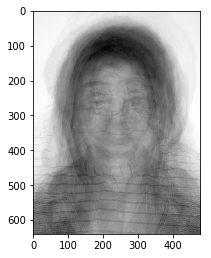

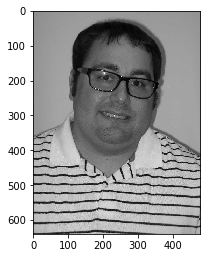

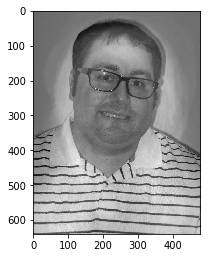

In [75]:
img_matrix_list = list(map(lambda img: np.matrix(img), imgs.values()))
centroid = np.mean( img_matrix_list, axis=0 )

# Main part of Q1
print(centroid.shape)
plot(centroid)

# Q1b striped shirt
plot(imgs["JBulger"])
cen_img_vecs = {name: img - centroid for name, img in imgs.items()}
plot(cen_img_vecs["JBulger"])

unrolled_imgs = [ img.flatten() for img in cen_img_vecs.values()]
unrolled_imgs = np.matrix(unrolled_imgs)  

u, s, vt = np.linalg.svd(unrolled_imgs, full_matrices=False)
print(u.shape)
print(s.shape)
print(vt.shape)

2) Describe how subtracting the centroid from all the images changed them (i.e., what's different between the base image and the centered image).

_A centered image can be thought of as the base image feature-normalized to better highlight which characteristics stick out for a given image_

    a) Display an original and a centered image next to each other (below is ok)

First: Centered Image
Second: Original Image


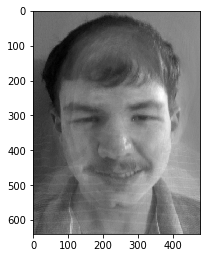

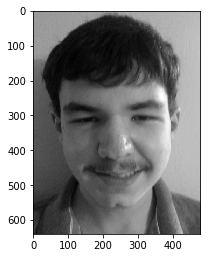

In [76]:
#  I hate my ID pic so I used Tommy's :D
print("First: Centered Image")
plot(cen_img_vecs["tshomer"])

print("Second: Original Image")
plot(imgs["tshomer"])

### Part 5 - Questions

3) We took the SVD of all the photos combined...
    
    a) State the size of the three SVD outputs.
    
  *  **U: (18, 18)**
  *  **S: (18,)**
  *  **Vh: (18, 307200)**
    
    
    b) What does one COLUMN of "U" represent for this problem?
    

_One column of U represents the eigenvector corresponding the matrix A(A.T) where A is the unrolled Image matrix.  Concretely, it's the relative weighting of features (derives 18) to each of the 18 images._


    c) What does one ROW of "V" represent for this problem?

_One row of V represents the eigenvector corresponding the matrix (A.T)A where A is the unrolled Image matrix. Within the context of this problem, we can view this as the relative weighting of each of the 307,200 pixels of a given image to the designated 18 features._
    
4) The first task asked you to unroll, then combine all the photos into one matrix. Explain why we didn't take the SVD of a single photo (which was already a matrix!). Your above answers may help you understand this. 

_Doing SVD on a singular image matrix would "function". However it would derive less insights to discern features within that picture.  This can be seen via the U matrix, since all features will have a constant weighting do to only having one source image.  A bit clearer sense, U would be of dimensions (1,1), there would be a single sigma value, and only 1 row to weight pixel to that single feature (i.e Vh would simply be the normalized, unrolled image vector._

5) Which of the above matrices could be seen as basis-images? Plot the best "basis image", based on your decomposition. Describe any interesting features you see.

_Since U is the weighting relative to the actual images, in addition it forming a column space for A, we can describe U as a basis image._ 

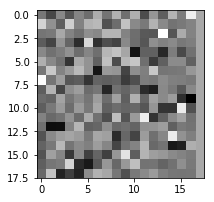

In [77]:
basis = np.matrix(u)
plot(basis)